In [10]:
import sys
import os
sys.path.append(os.path.abspath("../"))  # or "../../" depending on location
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [11]:
import torch
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import numpy as np
from torchvision import transforms
from utils.evaluate_fgsm_functions import *
from utils.load_models import set_device, get_CNN,get_resnet,get_CNN_small


In [ ]:
device = set_device()
    
fgsm_paths = {
    "CNN": "../attacks/fgsm/cifar10_fgsm_attack_byCNN.pt",
    "CNN_small": "../attacks/fgsm/cifar10_fgsm_attack_byCNNsmall.pt",
    "ResNet": "../attacks/fgsm/cifar10_fgsm_attack_byResNet.pt"
}

fgsm = fgsm_paths["CNN"]     #任意の敵対事例(fgsm)を指定

cnn = get_CNN().to(device) 
resnet = get_resnet().to(device) 

In [13]:
# 全体の精度を確認(CNN)
evaluate_accuracy_on_adv(cnn, fgsm, device=device)

Accuracy on Original:    81.35%
Accuracy on Adversarial: 47.99%


In [14]:
# 全体の精度を確認(ResNet)
evaluate_accuracy_on_adv(resnet, fgsm, device=device)

Accuracy on Original:    88.92%
Accuracy on Adversarial: 74.00%


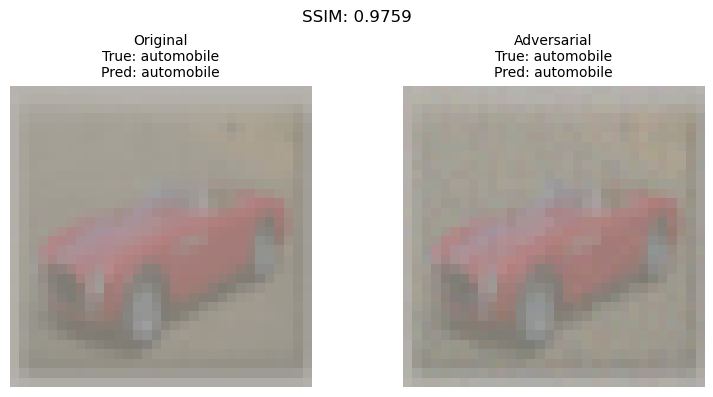

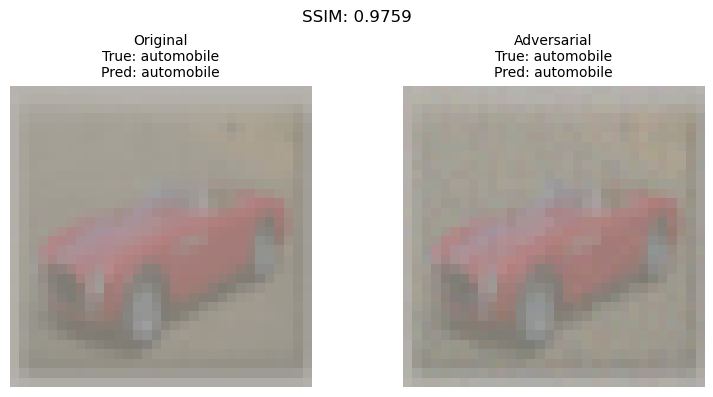

In [15]:
index = 1234  # 0 ~ 9999で任意の画像について確認
visualize_adversarial_pair(cnn, fgsm, index=index, device=device)
visualize_adversarial_pair(resnet, fgsm, index=index, device=device)